In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
freq_table = df['pclass'].value_counts()
rel_freq = df['pclass'].value_counts(normalize=True) * 100
cum_freq = freq_table.cumsum()

freq_df = pd.DataFrame({
    'Absolute': freq_table,
    'Relative (%)': rel_freq,
    'Cumulative': cum_freq
})
print(freq_df)


        Absolute  Relative (%)  Cumulative
pclass                                    
3            491     55.106622         491
1            216     24.242424         707
2            184     20.650954         891


In [6]:
table = pd.crosstab(df['sex'], df['survived'], margins=True, )
table = table.rename(columns={1: 'Survived = 1', 0: 'Survived = 0'})
table = table.rename(index={'male': 'Male', 'female': 'Female'})

table.columns.name = 'Survival'
table.index.name = 'Sex'

print(table)


Survival  Survived = 0  Survived = 1  All
Sex                                      
Female              81           233  314
Male               468           109  577
All                549           342  891


In [7]:
total = len(df)

# Joint probability: P(Sex = Female, Survived = 1)
joint_prob = len(df[(df['sex']=='female') & (df['survived']==1)]) / total
print(f"Joint Probability P(Sex = Female, Survived = 1): {joint_prob:.4f}")

#------------------------------------------------------------------------------------------------------------
p_female = len(df[df['sex']=='female']) / total
p_survived = len(df[df['survived']==1]) / total
print("\nMarginal probability -")
print(f"P(Sex = Female): {p_female:.4f} \nP(Survived = 1): {p_survived:.4f}")

#------------------------------------------------------------------------------------------------------------
print("Conditional probabilities - ")
# P(Survived=1 | Sex=female)
cond1 = joint_prob / p_female
print(f"\nP(Survived=1 | Sex=female): {cond1:.4f}")
female_given_survive = pd.crosstab(df['sex'], df['survived'], normalize='index')
female_given_survive = female_given_survive.rename(columns={1: 'Survived = 1', 0: 'Survived = 0'})
female_given_survive = female_given_survive.rename(index={'male': 'Not Female', 'female': 'Female'})

print(female_given_survive)

# P(Sex=female | Survived=1)
cond2 = joint_prob / p_survived
print(f"\nP(Sex=female | Survived=1): {cond2:.4f}")
survive_given_female = pd.crosstab(df['sex'], df['survived'], normalize='columns')
survive_given_female = survive_given_female.rename(columns={1: 'Survived = 1', 0: 'Survived = 0'})
survive_given_female = survive_given_female.rename(index={'male': 'Not Female', 'female': 'Female'})
print(survive_given_female)

Joint Probability P(Sex = Female, Survived = 1): 0.2615

Marginal probability -
P(Sex = Female): 0.3524 
P(Survived = 1): 0.3838
Conditional probabilities - 

P(Survived=1 | Sex=female): 0.7420
survived    Survived = 0  Survived = 1
sex                                   
Female          0.257962      0.742038
Not Female      0.811092      0.188908

P(Sex=female | Survived=1): 0.6813
survived    Survived = 0  Survived = 1
sex                                   
Female          0.147541      0.681287
Not Female      0.852459      0.318713


Pearson Correlation: 0.09606669176903894


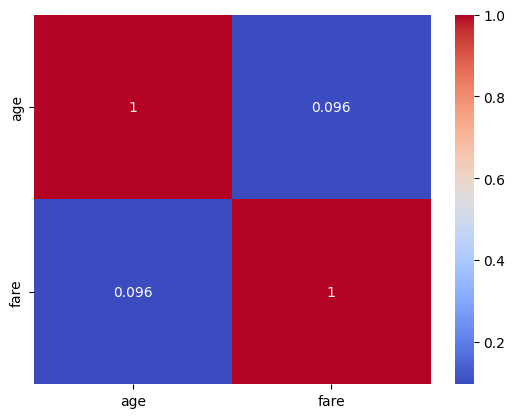

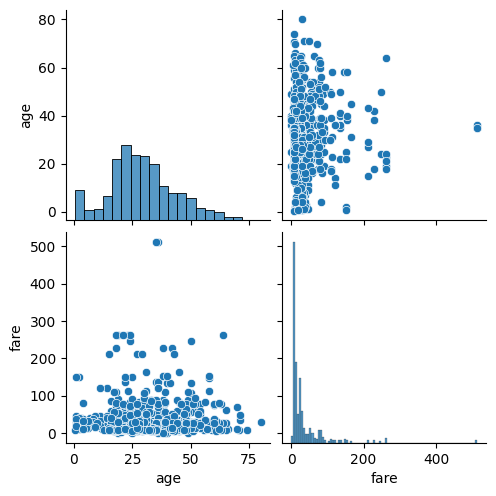

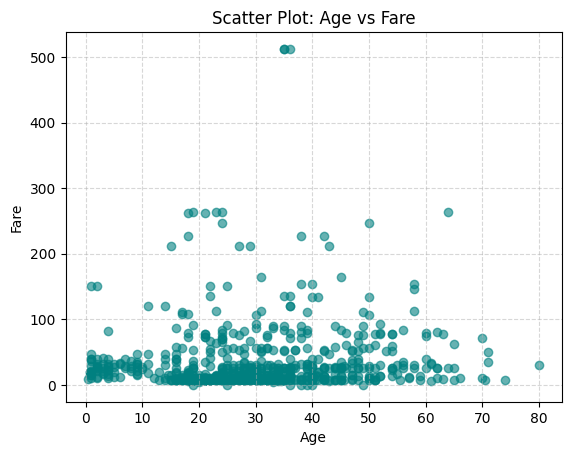

In [12]:
df_clean = df[['age','fare']].dropna()

corr = df_clean['age'].corr(df_clean['fare'])
print("Pearson Correlation:", corr)

sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()
sns.pairplot(df_clean)
plt.show()

plt.scatter(df_clean['age'], df_clean['fare'], alpha=0.6, color='teal')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



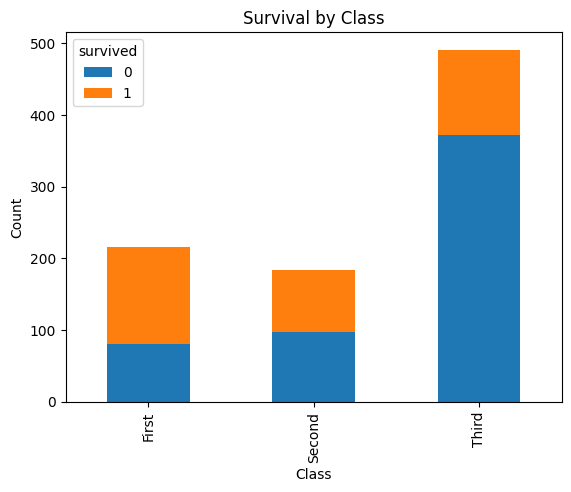

In [49]:
class_survival = pd.crosstab(df['class'], df['survived'])
class_survival.plot(kind='bar', stacked=True)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Survival by Class')
plt.show()
